In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [4]:
%matplotlib inline

In [5]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [6]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [7]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%)
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%)
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%)
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%)
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv'

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'      # 三月换手率均值
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'                   # 非流动性因子

In [8]:
# Constants
path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HSIndex='000300.SH'

In [95]:
#
sololist = [filenameMOM1M]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [96]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [97]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [98]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [99]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,300631.SZ,002774.SZ,002858.SZ,300629.SZ,603388.SH,603768.SH,603717.SH,300630.SZ,603178.SH,603833.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2006-12-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-14,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-18,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [101]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[-timeStampNum-1:-5][HSIndex]

In [102]:
LFCAPDF = np.log(ff.getData(filenameFCAP, timeStampNum, thresholdNum))

In [103]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [104]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [105]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2006-12-29 00:00:00 308
2007-01-31 00:00:00 278
2007-02-28 00:00:00 289
2007-03-30 00:00:00 270
2007-04-30 00:00:00 340
2007-05-31 00:00:00 304
2007-06-29 00:00:00 325
2007-07-31 00:00:00 282
2007-08-31 00:00:00 300
2007-09-28 00:00:00 318
2007-10-31 00:00:00 309
2007-11-30 00:00:00 302
2007-12-28 00:00:00 325
2008-01-31 00:00:00 317
2008-02-29 00:00:00 316
2008-03-31 00:00:00 300
2008-04-30 00:00:00 297
2008-05-30 00:00:00 309
2008-06-30 00:00:00 320
2008-07-31 00:00:00 271
2008-08-29 00:00:00 242
2008-09-26 00:00:00 260
2008-10-31 00:00:00 231
2008-11-28 00:00:00 254
2008-12-31 00:00:00 231
2009-01-23 00:00:00 212
2009-02-27 00:00:00 219
2009-03-31 00:00:00 228
2009-04-30 00:00:00 250
2009-05-27 00:00:00 238
2009-06-30 00:00:00 258
2009-07-31 00:00:00 241
2009-08-31 00:00:00 258
2009-09-30 00:00:00 251
2009-10-30 00:00:00 282
2009-11-30 00:00:00 289
2009-12-31 00:00:00 318
2010-01-29 00:00:00 297
2010-02-26 00:00:00 332
2010-03-31 00:00:00 341
2010-04-30 00:00:00 343
2010-05-31 00:00

In [106]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], timeStampNum, thresholdNum)
for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)

In [107]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF.sort_index(axis=1,inplace=True)

In [108]:
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0    0.228167
group_1    0.293508
group_2    0.320724
group_3    0.331187
group_4    0.299318
group_5    0.310443
group_6    0.268346
group_7    0.166797
group_8    0.081048
group_9   -0.039713
dtype: float64

In [109]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [110]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [111]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

54.07354426638216

In [112]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2016-10-31,1.86714,2.2383,2.37512,2.31983,2.06993,2.06003,1.75358,1.08792,0.525975,-0.239486
2016-11-30,1.89834,2.26611,2.39703,2.33943,2.10545,2.10095,1.78993,1.12896,0.544861,-0.201656
2016-12-30,1.8744,2.23955,2.35935,2.30629,2.0765,2.08219,1.77142,1.09252,0.492915,-0.266604
2017-01-26,1.90151,2.25828,2.37511,2.33103,2.09663,2.10889,1.79682,1.11525,0.512902,-0.266739
2017-02-28,1.89242,2.26255,2.37649,2.33032,2.09039,2.11693,1.80316,1.1168,0.512603,-0.270539


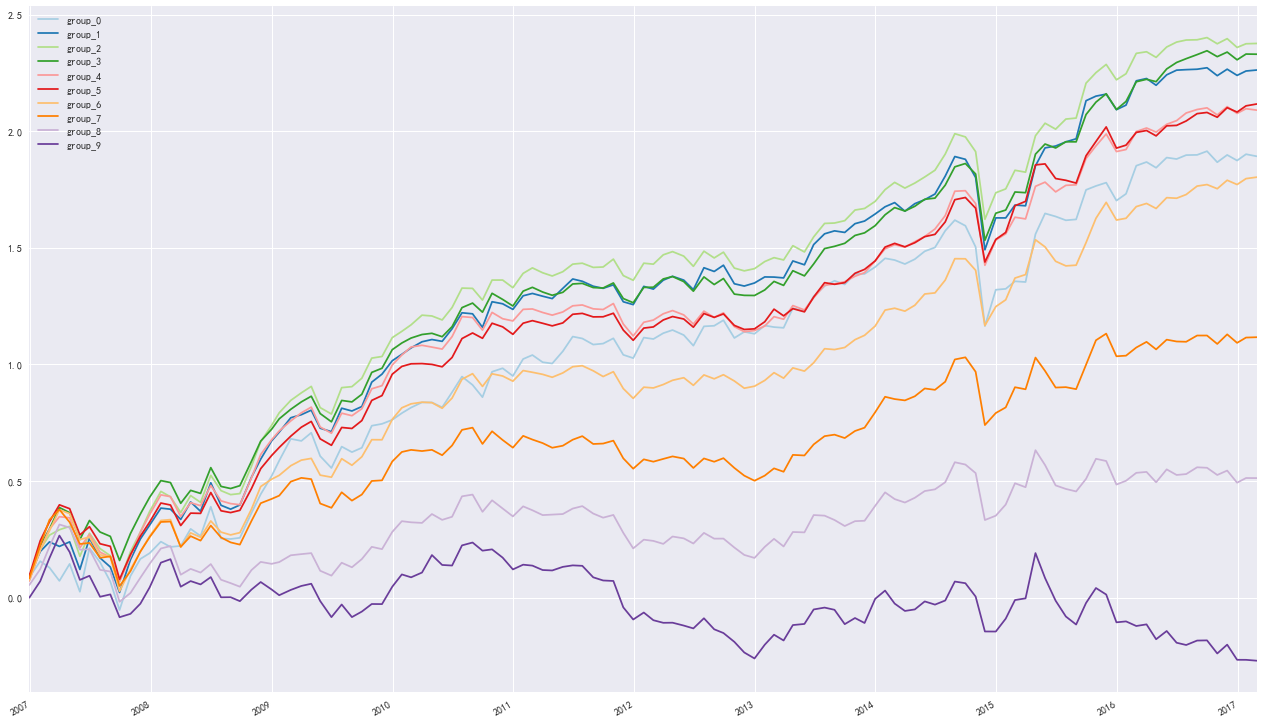

In [113]:
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),color=sns.color_palette("Paired",10))

In [114]:
ReturnDF.head()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2006-12-29,0.0871814,0.0889835,0.0745986,0.087048,0.0710644,0.093456,0.0754596,0.0833721,0.0541568,-0.000254773
2007-01-31,0.069047,0.108737,0.132266,0.134793,0.132869,0.150585,0.12833,0.140893,0.0677109,0.0707072
2007-02-28,-0.0276234,0.0411299,0.0610915,0.0726032,0.0902083,0.0817081,0.0830192,0.109467,0.0970494,0.0993267
2007-03-30,-0.0567465,-0.0192075,0.0232632,0.0918645,0.0529229,0.0722232,0.0896028,0.0440991,0.0947492,0.0963954
2007-04-30,0.0726642,0.0195682,0.0144487,-0.0223099,-0.00486124,-0.01656,-0.0160517,-0.054652,-0.0136043,-0.070683


In [115]:
ReturnForPlot =ReturnDF.copy()

In [116]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

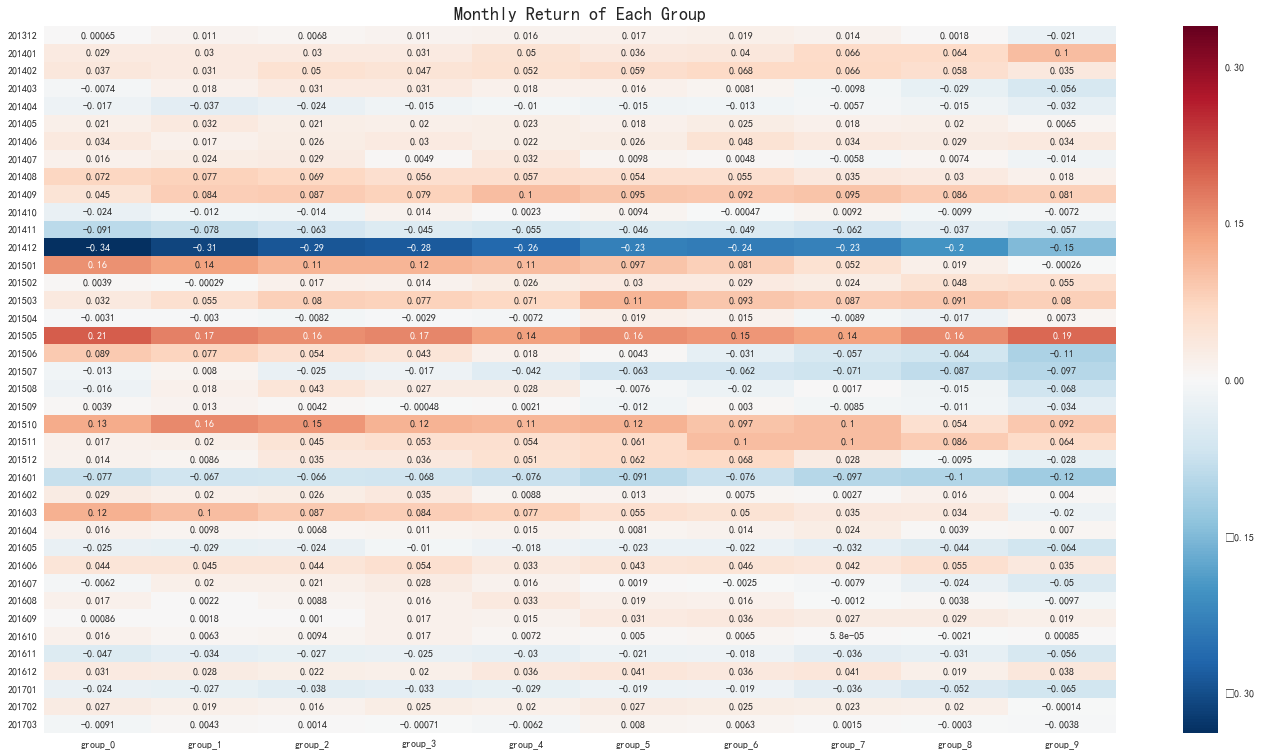

In [117]:
plt.figure(figsize=(24,13))
ax = plt.axes()
sns.heatmap(ReturnForPlot.iloc[-40:].astype(float),ax=ax, annot=True)
ax.set_title('Monthly Return of Each Group',fontsize=18, fontweight='bold')
plt.show()

In [118]:
### the following part is to save return data of every factor into one Dataframe

totalGroupDict ={}
finalDF = pd.DataFrame()
countNum = 0
for i,j in filenameDict.iteritems():
    
    for date in endOfMonthList:
        factorData = ff.getData(j, timeStampNum, thresholdNum)
        factorDataTemp = factorData.loc[:date].tail()
        factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
        #print factorDataTemp
        totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)
    ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
    for group in ReturnDF.columns.tolist():
        for time in ReturnDF.index:
            ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
    ReturnDF['factorName'] = i
    if countNum ==0:
        finalDF = ReturnDF
    else:
        finalDF=finalDF.append(ReturnDF)
    countNum+=1
finalDF.sort_index(axis=1,inplace=True)
    #totalGroupDict

In [119]:
#finalDF.shape

In [120]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [121]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [122]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([ 1, 13,  3, 10,  9, 25,  7, 14, 27, 24])

In [123]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [124]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [125]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [126]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [127]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [128]:
indusGroupDF.head(10)

煤炭      商贸零售   电力及公用事业      电力设备        机械        通信  \
time       stats                                                                
2006-12-29 mean    0.041602  0.050925  0.041869  0.079202  0.036563  0.023621   
           median  0.000916  0.031369  0.017263  0.032934  0.024764 -0.000608   
           std     0.103735  0.154742  0.123250  0.132849  0.114808  0.098470   
2007-01-31 mean    0.204360  0.259045  0.269857  0.222149  0.237658  0.241616   
           median  0.180515  0.231299  0.268665  0.181687  0.212162  0.224319   
           std     0.190080  0.208018  0.143132  0.195509  0.142381  0.130381   
2007-02-28 mean    0.124769  0.160218  0.169293  0.117467  0.111840  0.133419   
           median  0.101978  0.141091  0.165217  0.101103  0.107459  0.127021   
           std     0.155378  0.166391  0.163261  0.181240  0.143916  0.170879   
2007-03-30 mean    0.230949  0.202312  0.187981  0.201572  0.235284  0.150097   

                         建材      餐饮旅游        传媒     电子元器件  
time       stats                                           
2006-12-29 mean    0.051623  0.074327  0.030486  0.052814  
           median  0.008878  0.042982  0.003178  0.025180  
           std     0.121309  0.136061  0.122063  0.086138  
2007-01-31 mean    0.239615  0.275411  0.285632  0.250588  
           median  0.206136  0.245840  0.274354  0.242728  
           std     0.134028  0.161043  0.131706  0.133321  
2007-02-28 mean    0.156672  0.116180  0.096176  0.095049  
           median  0.093507  0.106533  0.083665  0.079563  
           std     0.210423  0.192561  0.144773  0.121678  
2007-03-30 mean    0.250333  0.211030  0.203792  0.194568

In [129]:
capGroupsDF.head()

small       mid      huge
time       stats                               
2006-12-29 mean   -0.002643  0.023469  0.097557
           median -0.003099  0.014730  0.068785
           std     0.112842  0.157362  0.159180
2007-01-31 mean    0.163607  0.208474  0.250457
           median  0.177667  0.219512  0.233571

In [130]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [131]:
newstack.head()

stats           mean                        median                      \
cap             huge       mid     small      huge       mid     small   
time                                                                     
2006-12-29  0.097557  0.023469 -0.002643  0.068785  0.014730 -0.003099   
2007-01-31  0.250457  0.208474  0.163607  0.233571  0.219512  0.177667   
2007-02-28  0.091453  0.123910  0.108505  0.074299  0.117290  0.107205   
2007-03-30  0.162759  0.197982  0.138003  0.153527  0.185950  0.157543   
2007-04-30  0.354994  0.329694  0.175851  0.332470  0.308804  0.188899   

stats            std                      
cap             huge       mid     small  
time                                      
2006-12-29  0.159180  0.157362  0.112842  
2007-01-31  0.230726  0.233918  0.181565  
2007-02-28  0.181494  0.196743  0.218920  
2007-03-30  0.143860  0.207378  0.222809  
2007-04-30  0.254199  0.267826  0.408377

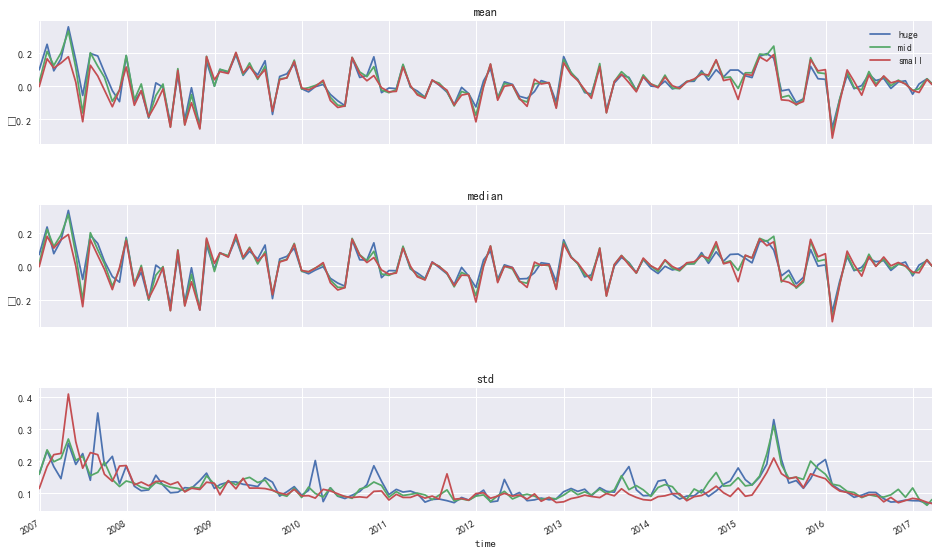

In [132]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [133]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

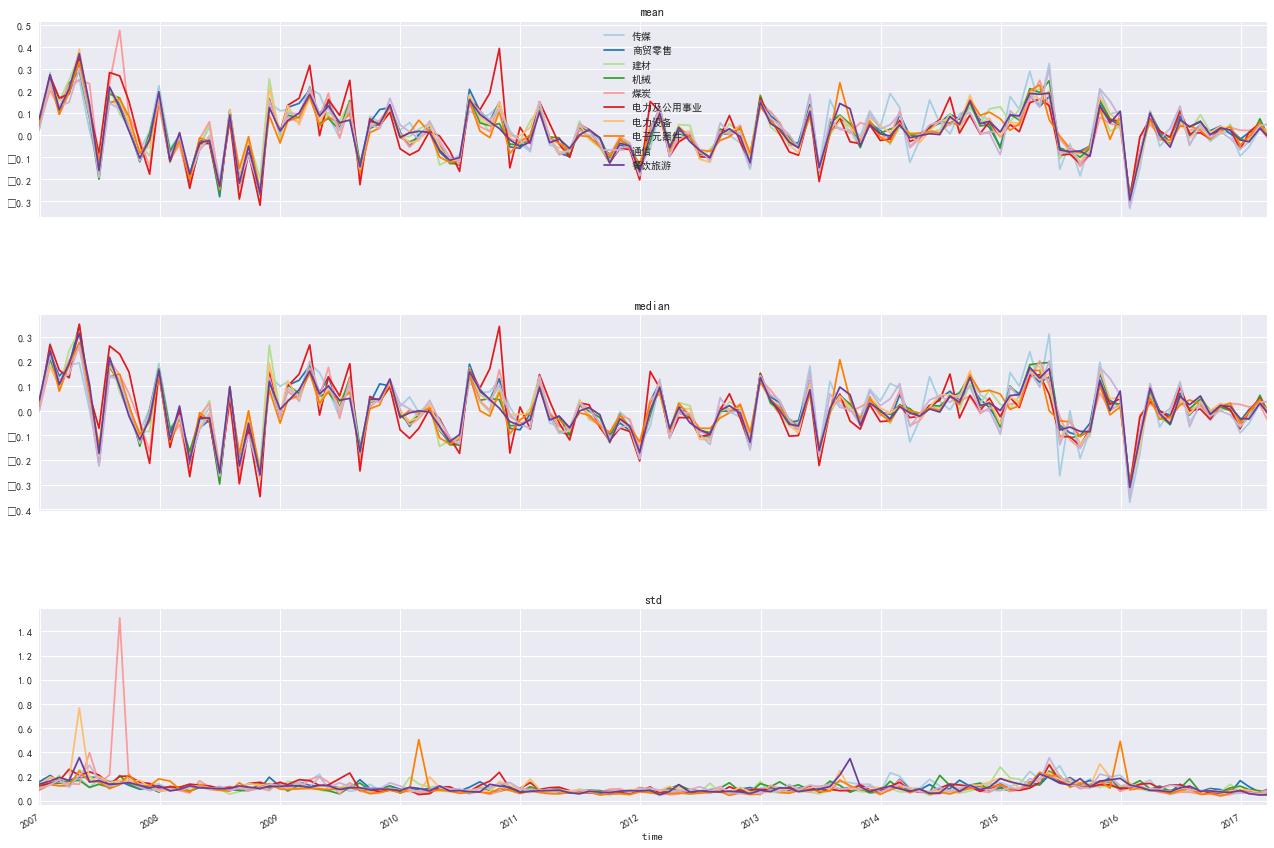

In [134]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [135]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [136]:
copydata.pivot_table(index='time',columns='stats').head()

small                           mid                      \
stats           mean    median       std      mean    median       std   
time                                                                     
2006-12-29 -0.002643 -0.003099  0.112842  0.023469  0.014730  0.157362   
2007-01-31  0.163607  0.177667  0.181565  0.208474  0.219512  0.233918   
2007-02-28  0.108505  0.107205  0.218920  0.123910  0.117290  0.196743   
2007-03-30  0.138003  0.157543  0.222809  0.197982  0.185950  0.207378   
2007-04-30  0.175851  0.188899  0.408377  0.329694  0.308804  0.267826   

                huge                      
stats           mean    median       std  
time                                      
2006-12-29  0.097557  0.068785  0.159180  
2007-01-31  0.250457  0.233571  0.230726  
2007-02-28  0.091453  0.074299  0.181494  
2007-03-30  0.162759  0.153527  0.143860  
2007-04-30  0.354994  0.332470  0.254199

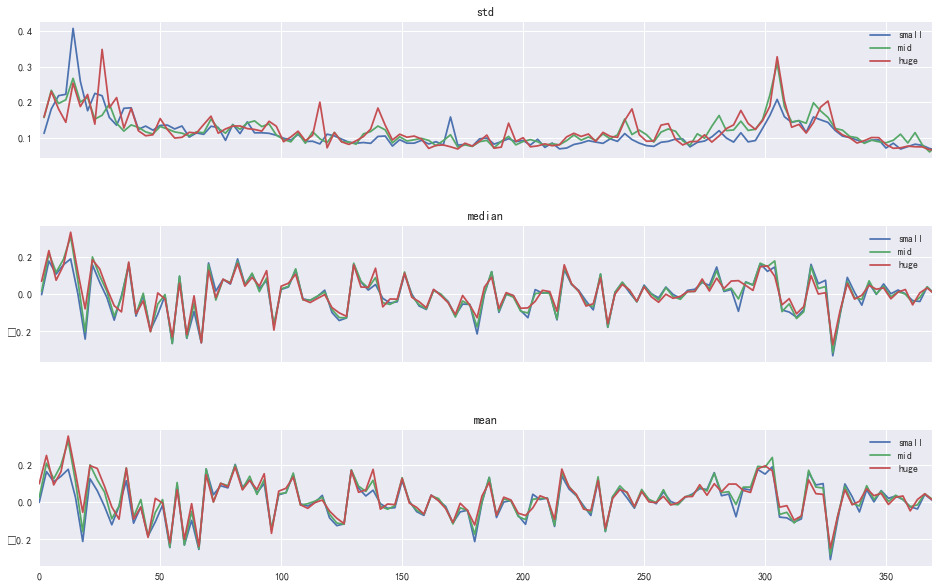

In [137]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)